In [1]:
import pandas as pd #data processing

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

test=test.fillna(' ') #fills null or empty cells for test 
train=train.fillna(' ') #fills null or empty cells for train 

test['total']=test['title']+' '+test['author']+test['text'] #combines the three columns to one column
train['total']=train['title']+' '+train['author']+train['text'] #combines the three columns to one column

In [2]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english') #Stores english stopwords to a variable

for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning - removes punctuation
    
    words = word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #lemmatization and combining of words
                                                                                            # to sentence
    train.loc[index,'total'] = filter_sentence #replace total value with cleaned sentence

In [3]:
X_train = train['total']
Y_train = train['label']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer() 
count_vectorizer.fit_transform(X_train) #learns the counts how many times a word is used
freq_term_matrix = count_vectorizer.transform(X_train) #counts the times a word is used and puts it in a matrix
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix) #learns the original value of the words
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) #converts the value in the array using tfidf 


In [5]:
from sklearn.model_selection import train_test_split

test_counts = count_vectorizer.transform(test['total'].values) #counts the times a word is used and puts it in a matrix
test_tfidf = tfidf.transform(test_counts)  #converts the value in the array using tfidf 

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0) #randomizes the place ment of the values

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(C=1e5) 
logreg.fit(X_train, y_train) 
pred = logreg.predict(X_test) 
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print(pred)
cm = confusion_matrix(y_test, pred) 
cm

C:\Users\zeldr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98
[0 1 1 ... 0 1 0]


array([[2495,   69],
       [  44, 2592]], dtype=int64)

In [7]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

In [8]:
X_train = train['total']
Y_train = train['label']

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', LogisticRegression(C=1e5, solver='lbfgs')),
])
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [11]:
import cv2
import pytesseract as pt

img = cv2.imread('C:\\Users\\zeldr\\Desktop\\Thesis\\Thesis Dataset\\Fake\\fake9.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 15)
text = pt.image_to_string(adaptive_threshold, config = "--psm 1")
stop_words = stopwords.words('english')
text = re.sub(r'[^\w\s]', '', text)
print(pipeline.predict([text]))

himg, wimg, _ = img.shape
boxes = pt.image_to_data(img)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        if len(b)==12:
            x,y,w,h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),1)
            
#cv2.imshow('Result', img)
print(text)
#cv2.waitKey(0)

[1]
DODGY DOSSIER The
TrumpRussia Dossier
Was Funded by Political
Rivals

21st Century Wire says This week an
unverified 35page document concerning
Presidentelect Donald Trump s alleged
ties to Russia had been published by
Buzzfeed The socalled dossier that
levied unfounded accusations against
Trump was initially given oxygen by CNN
and included an unsubstantiated sexual
blackmail scenario contained within the
leaked US intelligence summaryIt is too
early to tell exactly what the
implications of the leaked intelligence
dossier will be but there s no doubt that
ithas compounded an already tense
relationship between Trump



In [12]:
X_train = train['total']
Y_train = train['label']

count_vectorizer = CountVectorizer() 
count_vectorizer.fit_transform(X_train) #learns the counts how many times a word is used
freq_term_matrix = count_vectorizer.transform(X_train) #counts the times a word is used and puts it in a matrix
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix) #learns the original value of the words
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) #converts the value in the array using tfidf 

test_counts = count_vectorizer.transform(test['total'].values) #counts the times a word is used and puts it in a matrix
test_tfidf = tfidf.transform(test_counts)  #converts the value in the array using tfidf 

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0) #randomizes the place ment of the values



In [13]:
filter_sentence = ''
    
sentence = text
sentence = re.sub(r'[^\w\s]','',sentence) #cleaning - removes punctuation

words = word_tokenize(sentence) #tokenization

words = [w for w in words if not w in stop_words]  #stopwords removal

for word in words:
    filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #lemmatization and combining of words


In [14]:
logreg = LogisticRegression(C=1e5) 
logreg.fit(X_train, y_train) 
new_text1 = count_vectorizer.transform([filter_sentence])
new_text2 = tfidf.transform(new_text1)
pred = logreg.predict(new_text2)
print(pred)

C:\Users\zeldr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1]


In [15]:
feature_names = count_vectorizer.get_feature_names()
sorted(zip(logreg.coef_[0], feature_names), reverse=True)[:20]

[(54.64290146380723, 'us'),
 (40.65829342566536, 'october'),
 (39.63164351365938, '2016'),
 (34.911539500895096, 'november'),
 (27.3626048124683, 'presidentelect'),
 (23.203034376156797, 'socalled'),
 (22.435584131828296, 'oct'),
 (22.411680093393763, 'share'),
 (22.201009682254846, 'of'),
 (20.47769936679514, 'however'),
 (19.926467764603647, 'comment'),
 (19.898375810690368, 'snip'),
 (19.798713962933668, 'giuliani'),
 (19.634271040127018, 'altright'),
 (19.551621076506763, 'advertisement'),
 (19.444796988218975, 'source'),
 (19.153069829799875, 'tags'),
 (18.23018920720736, 'this'),
 (17.936784994598067, 'via'),
 (17.59413201614912, 'republican')]

In [16]:
sorted(zip(logreg.coef_[0], feature_names))[:100]

[(-120.40140681826827, 'breitbart'),
 (-71.43999577198434, '000'),
 (-51.422982831296196, 'york'),
 (-48.22402884961161, 'follow'),
 (-41.29652382084621, 'said'),
 (-39.05590777915061, 'twitter'),
 (-36.20525059119768, '2017'),
 (-35.94062320419752, 'times'),
 (-32.59942454735045, 'com'),
 (-28.769099167216666, 'but'),
 (-28.484604169471456, 'katherine'),
 (-24.847610554237676, 'jerome'),
 (-23.886002769692755, 'mr'),
 (-23.013011095196898, 'charlie'),
 (-22.09694547782435, 'ms'),
 (-20.909550908023682, 'president'),
 (-20.209372535718963, 'ian'),
 (-19.604600773949187, 'dr'),
 (-19.4761316798182, 'jeff'),
 (-18.903117263059336, 'sunday'),
 (-18.804820660997628, 'march'),
 (-18.315144436337377, 'pic'),
 (-17.951129285001535, 'administration'),
 (-17.811695041335867, 'islamic'),
 (-17.2966556106977, 'mrs'),
 (-17.041601568149755, 'todd'),
 (-16.819360911971188, 'pam'),
 (-16.690442182573452, 'http'),
 (-15.878400951115836, 'milo'),
 (-15.774667547677993, 'rodrigueza'),
 (-15.53209076129

In [17]:
import eli5
eli5.show_weights(logreg, feature_names=feature_names)

In [18]:
eli5.show_prediction(logreg, new_text2, feature_names=feature_names)

In [19]:
import joblib

filename = 'NLP.sav'

joblib.dump(pipeline, filename)

['NLP.sav']

In [20]:
real_words = ''
fake_words = ''
stopwords = set(stop_words) 
  
# iterate through the csv file 
for val in train[train['label']==0].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==1].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

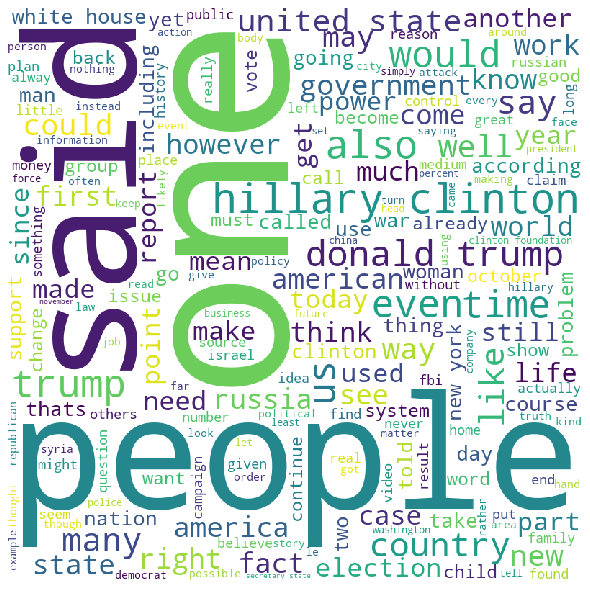

In [21]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt 
%matplotlib inline

wordcloud_fake = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

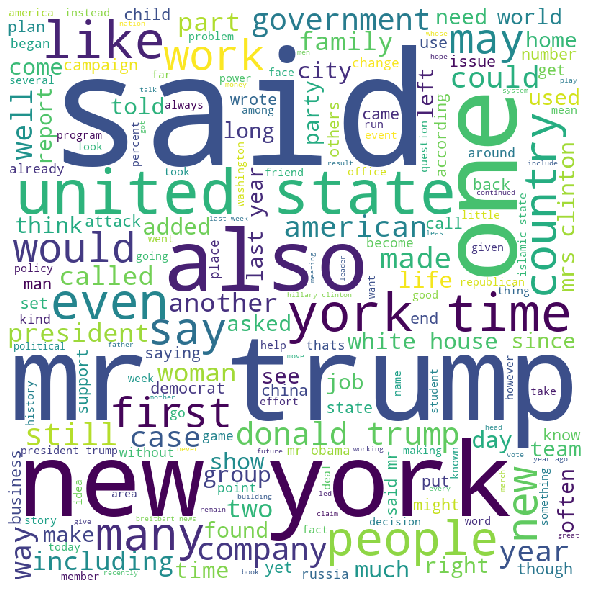

In [22]:
wordcloud_real = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_real) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [23]:
import cv2
import pytesseract as pt

import flask

import os
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

from flask import Flask, render_template, abort, jsonify, request, render_template
import joblib
from flask_wtf import FlaskForm
import json
from wtforms import FileField
from flask_uploads import configure_uploads, IMAGES, UploadSet


In [ ]:
NLP = joblib.load('./NLP.sav')

app = Flask(__name__)


app.config['SECRET_KEY'] = 'thisisasecret'
app.config['UPLOADED_IMAGES_DEST'] = 'uploads/images'

images = UploadSet('images', IMAGES)
configure_uploads(app, images)

class MyForm(FlaskForm):
    image = FileField('image')

@app.route('/', methods=['GET', 'POST'])
def index():
    form = MyForm()

    if form.validate_on_submit():
        stop_words = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
        filename = images.save(form.image.data)
        img = cv2.imread(f'C:\\Users\\zeldr\\Desktop\\Thesis app\\uploads\\images\\{ filename }')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 15)
        text = pt.image_to_string(adaptive_threshold, config = "--psm 1")
        filter_sentence = ''
    
        sentence = text
        sentence = re.sub(r'[^\w\s]','',sentence) #cleaning - removes punctuation

        words = word_tokenize(sentence) #tokenization

        words = [w for w in words if not w in stop_words]  #stopwords removal

        for word in words:
            filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
        result=request.form
        text = [filter_sentence]
        print(text)
        user_input = {'query':text}
        pred = NLP.predict(text)
        print(pred)
        dic = {0:'real',1:'fake'}
        return f'Image is {dic[pred[0]]}'

    return render_template('index.html', form=form)
    

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jan/2021 13:49:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2021 14:13:47] "POST / HTTP/1.1" 200 -


[' dodgy dossier the trumprussia dossier was funded political rivals 21st century wire say this week unverified 35page document concerning presidentelect donald trump alleged tie russia published buzzfeed the socalled dossier levied unfounded accusation trump initially given oxygen cnn included unsubstantiated sexual blackmail scenario contained within leaked us intelligence summaryit early tell exactly implication leaked intelligence dossier doubt ithas compounded already tense relationship trump']
[1]


127.0.0.1 - - [19/Jan/2021 14:14:39] "GET / HTTP/1.1" 200 -


In [27]:
from timeit import timeit

mycode = '''
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import joblib
import re
import cv2
import pytesseract as pt

NLP = joblib.load('./NLP.sav')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
img = cv2.imread(r'C:/Users/zeldr/Desktop/Thesis/Thesis Dataset/Fake/fake9.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 15)
text = pt.image_to_string(adaptive_threshold, config = "--psm 1")
filter_sentence = ''

sentence = text
sentence = re.sub(r'[^\w\s]','',sentence) #cleaning - removes punctuation

words = word_tokenize(sentence) #tokenization

words = [w for w in words if not w in stop_words]  #stopwords removal

for word in words:
    filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

text = [filter_sentence]
print(text)
user_input = {'query':text}
pred = NLP.predict(text)
print(pred)
dic = {0:'real',1:'fake'}
print(f"Image is {dic[pred[0]]}")

'''

time = timeit(stmt = mycode,  number = 10)

print(f"Run time: {time}")

[' dodgy dossier the trumprussia dossier was funded political rivals 21st century wire say this week unverified 35page document concerning presidentelect donald trump alleged tie russia published buzzfeed the socalled dossier levied unfounded accusation trump initially given oxygen cnn included unsubstantiated sexual blackmail scenario contained within leaked us intelligence summaryit early tell exactly implication leaked intelligence dossier doubt ithas compounded already tense relationship trump']
[1]
Image is fake
[' dodgy dossier the trumprussia dossier was funded political rivals 21st century wire say this week unverified 35page document concerning presidentelect donald trump alleged tie russia published buzzfeed the socalled dossier levied unfounded accusation trump initially given oxygen cnn included unsubstantiated sexual blackmail scenario contained within leaked us intelligence summaryit early tell exactly implication leaked intelligence dossier doubt ithas compounded already